In [ ]:
import json
import pandas as pd

# Load the JSON export
with open("../assets/conversations.json", "r", encoding="utf-8") as f:
    data = json.load(f)
from allPrompts import load_prompts

df = load_prompts("../assets/conversations.json")

print(f"Total prompts collected: {len(df)}")

Total prompts collected: 59081
                                node_id                             parent_id  \
0  af7fa3f3-8f99-4b93-bd13-668068a4f7b0  c43bcadb-e133-4275-82bf-066b909ccaf2   
1  f66bea5d-01a1-483f-bd4e-57f977ea3611  af7fa3f3-8f99-4b93-bd13-668068a4f7b0   
2  98c70e82-2e3c-4d90-b2a0-f510300abcd4  781097a7-0c87-4d67-b3a3-378ba0eb15ec   
3  02b05246-b7ce-448a-91b5-52a2c61c21e1  11954150-1ebc-4590-abe5-744d3afc9606   
4  55bf61f2-74f7-4d4e-9ba8-cb98fbadd118  8810336e-8a58-4bc4-b19b-737afc1361d5   

                                                text   create_time update_time  
0                                                              NaN        None  
1  i'm looking for scalable income sources for infps  1.760035e+09        None  
2  i dream about watering my money tree and just ...  1.760036e+09        None  
3  i suddenly have a moment of recaibration as if...  1.760036e+09        None  
4  for me it's more visceral. you feel the tensio...  1.760036e+09        Non

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('0', 20014), ('like', 12892), ('const', 11425), ('know', 11240), ('de', 8721), ('het', 8218), ('je', 8198), ('type', 7957), ('ik', 7836), ('think', 7631), ('people', 7625), ('also', 7237), ('en', 7078), ('dat', 7024), ('actually', 6460), ('8', 6432), ('te', 6397), ('want', 6390), ('een', 6275), ('would', 5895)]


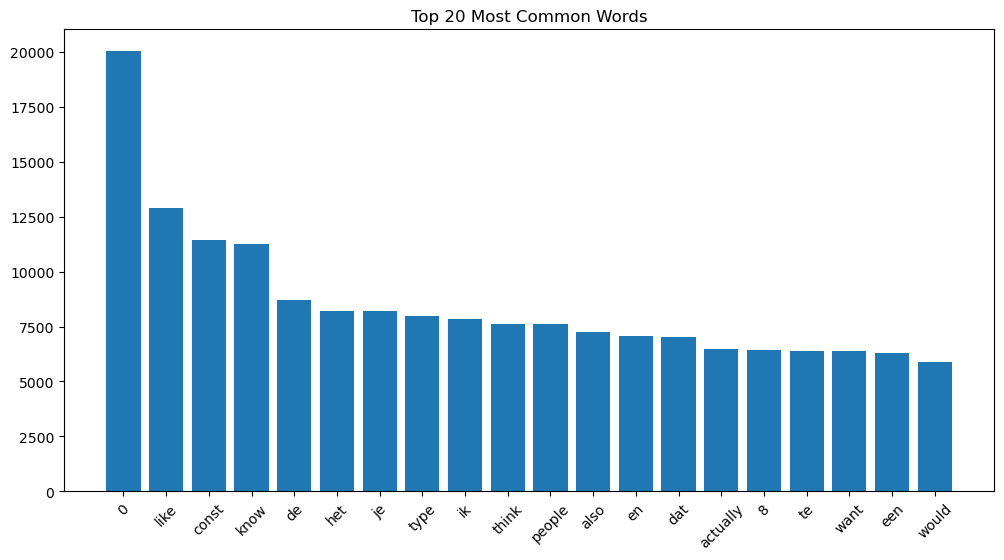

In [5]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Make sure NLTK stopwords are downloaded
import nltk
nltk.download('stopwords')

# Combine all prompt text into a single string
all_text = " ".join(df['text'].dropna().astype(str))

# Clean text: lowercase, remove punctuation
clean_text = re.sub(r'[^\w\s]', '', all_text.lower())

# Split into words
words = clean_text.split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count word frequency
word_counts = Counter(filtered_words)

# Show the 20 most common words
most_common = word_counts.most_common(20)
print(most_common)

# Optional: Plot a bar chart
words, counts = zip(*most_common)
plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.title("Top 20 Most Common Words")
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 20 meaningful words: [('like', 12944), ('const', 11593), ('know', 11241), ('type', 9320), ('react', 8680), ('runtime', 8086), ('people', 7685), ('think', 7645), ('also', 7238), ('actually', 6460), ('name', 6002), ('return', 5988), ('would', 5938), ('kind', 5679), ('effect', 5638), ('use', 5562), ('get', 5457), ('context', 5319), ('string', 4728), ('id', 4606)]


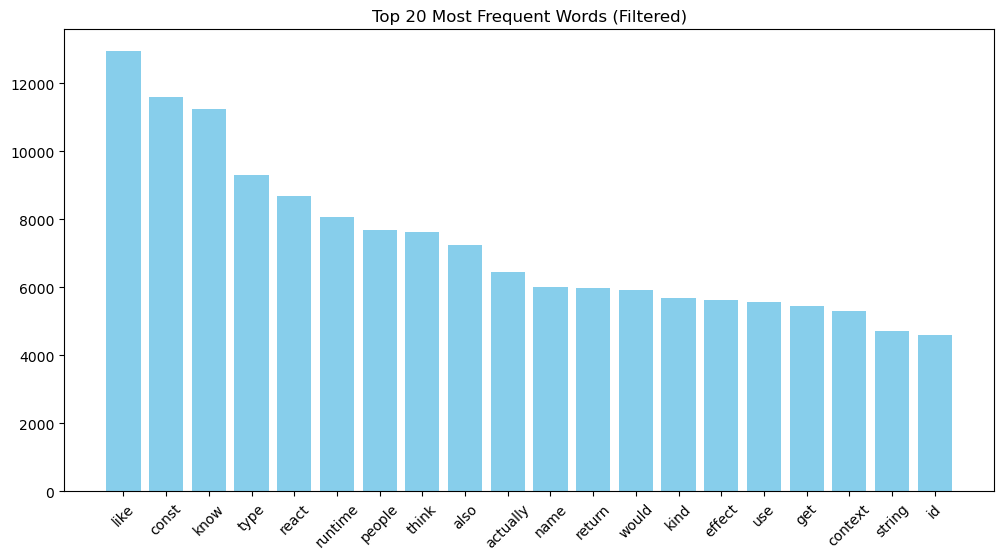

In [6]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk

# Download stopwords if you haven't yet
nltk.download('stopwords')

# Combine all prompts into one text
all_text = " ".join(df['text'].dropna().astype(str))

# Lowercase and remove punctuation/numbers
cleaned_text = re.sub(r'[^a-zA-Z\s]', ' ', all_text.lower())

# Tokenize
words = cleaned_text.split()

# Remove English and Dutch stopwords
stop_words = set(stopwords.words('english')) | set(stopwords.words('dutch'))
filtered_words = [w for w in words if w not in stop_words and len(w) > 1]

# Count frequency
word_counts = Counter(filtered_words)
most_common = word_counts.most_common(20)

print("Top 20 meaningful words:", most_common)

# Plot
words_plot, counts_plot = zip(*most_common)
plt.figure(figsize=(12,6))
plt.bar(words_plot, counts_plot, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words (Filtered)")
plt.show()